# 1 - Introduction au langage SQL 
## Introduction aux tables et aux bases de données 

Ce cours présente une introduction au langage SQL au travers de 5 notebooks.

- Le premier notebook ci-dessous détaille les principes généraux des tables et bases de données, éléments principaux permettant l'utilisation du langage SQL.
- Le second notebook présentera les principales requêtes SQL.
- Le troisième notebook approfondira la notion de requêtes en introduisant notamment les jointures.
- Le quatrième notebook présentera les opérations permettant d'effectuer des modifications sur les tables ou les bases de données.
- Le cinquième notebook (bonus) présentera le fonctionnement de SQLAlchemy, qui permet d'utiliser des requêtes SQL directement avec Python.
- Les bases de données : SGBD et BDDr     

Un système de gestion de base de données (SGBD) est un logiciel permettant à des utilisateurs d'accéder à une base de données. C'est ce logiciel qui gère les accès différenciés (identification, sécurité) et qui interprète les requêtes pour ingérer, modifier, retourner ou supprimer des données. On distingue deux grandes familles de SGDB : les SGDB relationnels et les SGDB NoSQL.

Les SGBD peuvent être associés à des environnement de développement (IDE en anglais), des logiciels qui contiennent des éditeurs de texte et des consoles SQL permettant d'écrire et d'exécuter des requêtes SQL de manière simplifiée.

## Les SGBD les plus utilisés actuellement sont:

- PostGreSQL
- Microsoft SQL Server
- MySQL
- Oracle Database    

Ces SGBD sont utilisés sur des IDE tels que DBeaver ou Microsoft SQL SERVER Management Studio.

Les bases de données relationnelles (BDDr) sont utilisées depuis les années 70, elles sont aujourd'hui les plus populaires et dans une certaine mesure, les plus simples à utiliser. Ces bases de données utilisent des tables pour stocker les données. Ces tables suivent un schéma strict qui impose aux données des contraintes sur leur structure.

Pour interagir avec ces SGDB, on utilise en général le langage SQL (Structured Query Language) afin de créer des requêtes sur les bases de données. SQL est très répandu et plutôt simple d'utilisation. C'est donc un langage incontournable du monde de la Data.

## Schémas et tables 
Les tables utilisées dans les bases de données sont des ensembles d'enregistrements (ou observations) qui forment les lignes de la table. Chacune des valeurs d'un enregistrement correspond à un attribut. Les attributs forment les colonnes de la table.

On peut comparer une table à un tableau excel (ou à un DataFrame), les enregistrements correspondant aux lignes et les attributs aux colonnes du tableau excel.

Les tables sont caractérisées par leur schéma. Le schéma d'une table doit contenir ses attributs, leurs types et les contraintes sur ces attributs. On peut dire que le schéma est une définition ou une "empreinte" de la table.

Regardons ensemble l'exemple de la table Films :



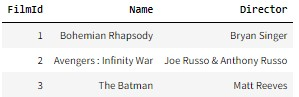

Chaque enregistrement de la table correspond à un film. Les colonnes de la table correspondent à leurs caractéristiques:

- FilmId : l'identifiant unique du film (un entier).
- Name : Le nom du film (une chaîne de caractères).
- Director : le réalisateur (une chaîne de caractères).   

Nous venons de définir le schéma de cette table : nous avons donné le nom et le type de chacun des attributs de la table.

On fera souvent référence à une table avec son nom suivi du nom de ses attributs entre parenthèses :



Films(FilmId, Name, Director)
On appelle cette représentation la représentation formelle de la table.

## 1. Types de variables
Les attributs peuvent prendre de nombreux types en SQL. Selon les SGBD, les types peuvent varier mais on retrouve principalement les suivants :

- Type SQL	Type
- INTEGER	Entier
- FLOAT	Nombre à virgule flottante (décimal)
- DOUBLE	Nombre flottant à double précision
- BOOLEAN	Valeur booléenne (True, False)
- DATE	Date
- DATETIME	Date et heure
- VARCHAR	Chaîne de caractères   


(a) Donner le schéma et la représentation formelle de la table Sales décrite ci-dessous.

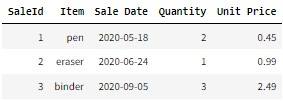

In [ ]:
'''
`SaleId` : Identifiant unique de la vente (INTEGER)
`Item` : Nom de l'article vendu (VARCHAR)
`Sale Date` : Date de la vente (DATE)
`Quantity` :  Quantité d'items vendus (INTEGER)
`Unit Price` : Prix unitaire de l'item (FLOAT ou DOUBLE)

La représentation formelle de la table est donnée par:
Sales(SaleId, Item, Sale date, Quantity, Unit Price)
'''

## 2. Transactions
Une transaction est une suite d'opérations nécessitant des accès en lecture ou en écriture qui est effectuée via un système de gestion de bases de données.

Pour garantir l'intégrité d'une base de données, il est nécessaire que ces transactions soient fiables.

Une des manières de garantir des transactions fiables est de vérifier les propriétés **ACID**, acronyme pour :

- Atomicité : Une transaction doit pouvoir être effectuée en entier ou sinon elle sera abandonnée. Si une opération de la transaction est refusée, toutes les autres opérations de la transaction le seront également.
- Cohérence : L'état initial et l'état final de la base doivent être cohérents, i.e. toutes les contraintes d'intégrité de la base de données doivent être respectées à la suite d'une transaction.
- Isolation : Une transaction doit s'effectuer indépendamment des transactions qui s'exécutent en même temps. Les états intermédiaires d'une transaction sont cachés aux autres.
- Durabilité : Lorsqu'une transaction est validée, ses effets doivent être stockés "en dur" et donc persister même dans le cas d'un crash du système ou d'une coupure de courant.   

Les bases de données relationnelles vérifient les propriétés ACID au contraire des bases NoSQL. Les transactions ne sont donc pas aussi fiables pour ces dernières, mais elles peuvent être plus performantes sur de grandes bases de données.

## Clés et contraintes 
## 1. Clé primaire
Reprenons la table Films définie précédemment:

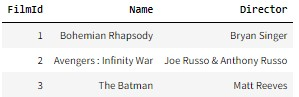

L'attribut FilmId est un identifiant qui définit de manière unique chacune des lignes.

On dira que cet attribut définit la clé primaire de la table Films.

Les attributs Name et Director ne subissent pas cette contrainte : des films peuvent avoir le même nom ou le même réalisateur.

Pour représenter le fait que l'attribut FilmId est la clé primaire, on le souligne dans la représentation formelle de la table :
- Films(FilmId, Name, Director)   

Ce qu'il faut absolument retenir sur les clés primaires:

- La clé primaire d'une table est la donnée qui permet d'identifier de manière unique un enregistrement de la table.
- Elle peut être composée de un ou plusieurs attributs (on en reparlera dans la suite avec les clés composites).
- La clé primaire doit toujours être renseignée et doit être unique dans la table (deux enregistrements ne peuvent pas avoir la même clé primaire).   

b) Donner les clés primaires des tables suivantes:
Sales  puis Transactions

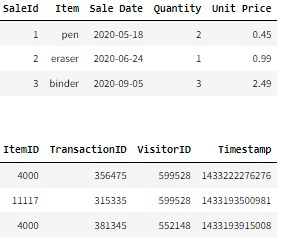

In [ ]:
'''
La clé primaire de la table Sales est : SaleID. C'est bien un identifiant unique et systématique.
La clé primaire de la table Transactions est : TransactionID. En effet, un ItemID et un VisitorID peuvent être liés
à plusieurs transactions. De même, selon la précision de votre timestamp, il pourrait y avoir plusieurs transactions
simultanément. 
'''

## 2. Clé étrangère
En règle générale, les bases de données relationnelles contiennent plusieurs tables. Par exemple, on peut retrouver dans la même base de données les tables Actors et Countries :

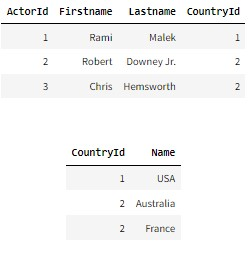

La représentation formelle de la table Countries est : 
- **Countries(CountryId, Name)**   

On peut remarquer que la table Actors contient l'attribut CountryId qui fait référence à la clé primaire de la table Countries. Cet attribut est une clé étrangère de la table Actors. On représente la clé étrangère par un # dans la représentation formelle de la table :
- Actors(ActorId, Firstname, Lastname, #CountryId)   

Une **clé étrangère** identifie une colonne (ou un ensemble de colonnes) d'une table comme une référence à une colonne d'une autre table (la référencée). La colonne de la table référencée doit être une clé primaire ou faire partie d'une contrainte d'unicité. Ainsi la contrainte de clé étrangère garantit que chacune des valeurs de la table existe dans la table référencée : une ligne de la table ne peut pas contenir un ensemble de valeurs qui n'existent pas dans la table référencée.   

Par exemple, il n'est pas possible de rajouter un acteur espagnol dans la table Actors car l'enregistrement de la colonne CountryId doit exister dans la table Countries.

Voici la table Casting de la même base de données qui associe les acteurs aux films dans lesquels ils ont joué :


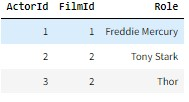

 La table Casting est une **table d'attribution** : elle permet de relier les tables Films et Actors.
- c) Donner la représentation de la table Casting.
- d) Peut-on ajouter la ligne (2, 4, Sherlock Holmes) à la table Casting? Pourquoi ?

In [ ]:
'''
c) Casting(#ActorId, #FilmId, Role)
d) La réponse est non. La colonne FilmId de la table Casting est une clé étrangère faisant référence à la clé primaire 
de la table Films. Comme il n'existe pas de FilmId égal à 4 dans la table Films, il est impossible de rajouter 
la ligne à la table Casting. Il faudrait d'abord rajouter la ligne (4, Sherlock Holmes, Guy Ritchie) à la table Films.

'''

## 3. Clé composite
Une clé composite est une clé sur plusieurs attributs. Il existe des clés primaires composites, par exemple une adresse : pour qu'elle soit unique il faut préciser le numéro, le nom de la rue, le nom de la ville, le code postal et le pays. On pourrait stocker toutes ces informations dans une seule variable mais on perdrait la possibilité de faire des requêtes par ville ou par rue par exemple.

Pour revenir à notre table Casting, la clé primaire n'est ni FilmId (car il y a plusieurs acteurs qui jouent pour le même film), ni ActorId (car un acteur peut jouer dans différents films).

Ainsi la clé primaire de Casting est le couple (FilmId, ActorId) qui définit de manière unique un tuple dans cette table. On a donc :

- Casting(#ActorId, #FilmId, Role)    

La table Books recense les livres écrits par Sir Arthur Conan Doyle et publiés dans plusieurs langues.

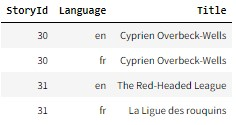

- e) Quelle est la clé primaire de la table Books ?

In [ ]:
'''
L'attribut StoryId n'est pas unique dans la table Books car les traductions de la même histoire possèdent le même StoryId. 
Le titre n'est pas non plus unique car le titre peut être le même pour deux livres de langues différentes pour la même oeuvre.
La seule manière de définir de façon unique un livre est donc le couple (StoryId, Language).
'''

## 4. Contraintes
Pour modifier une table, il faut respecter les contraintes qui lui sont imposées. Il en existe 4 types :

- Contrainte de domaine : Elle définit quelle valeur peut prendre un attribut, c'est-à-dire le type de données et des restrictions sur ce type.

- Contrainte de clé : Les lignes d'une table ne peuvent pas posséder la même clé primaire ou ne pas posséder de clé primaire.

- Contrainte de table : C'est une contrainte qui généralise les deux précédentes. Lors de la création d'une table, on ajoutera une contrainte sur les valeurs que peuvent prendre les attributs de cette dernière.

- Contrainte d'intégrité référentielle : Un attribut ne peut prendre comme valeur qu'une valeur existant comme clé (primaire ou non) d'une autre relation. Elle interdit donc l'existence d'un tuple qui fait référence à un tuple inexistant dans une autre table.

## Schémas relationnels 
Comme on l'a vu avec les clés étrangères, les tables peuvent avoir des relations : c'est ce qu'on appelle un schéma relationnel. Il peut s'agir d'une colonne commune aux 2 tables, ou bien de 2 colonnes distinctes reliées par une autre table (table d'attribution).

Les lignes d'une table peuvent donc correspondre à des lignes dans d'autres tables par correspondance :

- One to One : 1 ligne correspond à 1 autre ligne de l'autre table.
- One to Many : 1 ligne d'une table correspond à plusieurs lignes dans une autre table.
- Many to Many : 1 ligne d'une table peut correspondre à plusieurs lignes de l'autre table et inversement.   

En gardant la même base de données que précédemment, on peut construire la table Synopsis qui donne le résumé de chaque film de la table Films.

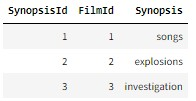

- f) Quelle est la relation entre les tables Films et Actors ?
- g) Quelle est la relation entre les tables Films et Synopsis ?
- h) Quelle est la relation entre les tables Films et Casting ?

In [ ]:
'''
- f) Plusieurs acteurs jouent dans un même film et un acteur peut jouer dans différents films. 
C'est donc une relation **Many to Many**.   
- g) Chaque film correspond à un résumé et réciproquement (on peut remarquer que FilmId est une clé primaire de Synopsis). 
C'est donc une relation **One to One**.   
- h) Chaque film peut correspondre à plusieurs lignes de la table Casting (toutes les lignes correspondant au film). 
En revanche, une ligne de la table Casting ne correspond qu'à un seul film. C'est donc une relation **One to Many**.
'''

## Conclusion 
Vous savez désormais ce qu'est une base de données relationnelle et êtes familiers avec ses principales caractéristiques.

Voici ce qu'il faut retenir de ce cours avant d'avancer sur le cours Requêtes SQL :

Les principales caractéristiques des bases de données relationnelles (schéma, attributs, tuples, propriétés ACID).
- Les clés primaires identifient de manière unique un tuple d'une table.
- Les clés étrangères sont les clés primaires d'autres tables.
- Les clés peuvent être composites.
- Les principaux types de schémas entre des tables.

# 2 - Requêtes SQL 

Nous avons vu précédemment comment sont structurées les bases de données relationnelles et quels sont leurs avantages pour effectuer des requêtes.

## La projection 
La projection est la requête fondamentale en SQL. Elle consiste à afficher certaines colonnes d'une table grâce au mot-clé SELECT.

Pour afficher une table complètement, on peut sélectionner toutes les colonnes grâce à l'astérisque *.

On spécifie ensuite le nom de la table grâce au mot-clé FROM.

On prendra l'habitude de revenir à la ligne après chaque commande, et de marquer la fin de la requète avec le symbole ;.

La requête prendra donc cette forme :

SELECT * 
FROM table;

SELECT AlbumId, ArtistId 
FROM albums;

Pour éviter les répétitions dans une projection, on peut utiliser le mot-clé DISTINCT avant les noms de colonne.

- d) Afficher tous les ArtistId distincts de la table albums.

SELECT DISTINCT ArtistId    # en minuscule marche mieux chez eux select distinct...
FROM albums;

- e) Afficher le nom, le prénom et le poste des employés de la chinookcorp, contenus dans la table employees. Il sera nécessaire d'identifiant les colonnes correspondantes.
La table employees se présente comme ceci :

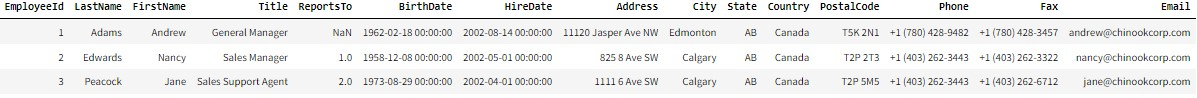

select LastName, FirstName, Title
from employees;

## La sélection simple 
La sélection simple consiste à choisir des éléments d'une table vérifiant une certaine condition. On utilise la commande SELECT associée au mot-clé WHERE pour imposer la (ou les) condition(s). La syntaxe générale est la suivante :

SELECT colonne1, colonne2     
FROM table1    
WHERE condition;   

## 1. Opérateurs pour les conditions
Pour construire les conditions, on retrouve principalement en SQL les opérateurs suivants :

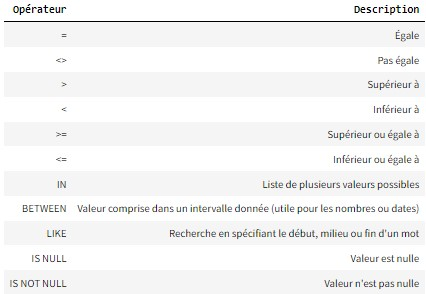

Il est également possible de combiner plusieurs conditions avec le ou, le et et le non logique grâce aux mots clés **AND, OR et NOT**.

Voici plusieurs questions permettant de mettre en pratique ces notions. La table employees sera celle utilisée.

- a) Afficher les employés habitants à 'Calgary'.

select * from employees where City = 'Calgary';

select * from employees where City = 'Edmonton' or 'Lethbridge';    
employés habitants à 'Edmonton' ou à 'Lethbridge'

SELECT LastName, FirstName, Title FROM employees  WHERE ReportsTo <> 'None' ( ou IS NOT NULL )      
Afficher le nom, le prénom et le poste des employés possédant un supérieur hiérarchique (la colonne ReportsTo contient l'Id du supérieur hiérarchique de l'employé).

SELECT * FROM employees WHERE EmployeeId <= 5 ;    
Afficher les employés dont l'identifiant est plus petit que 5 compris.

SELECT * FROM employees WHERE EmployeeId >= 2 AND EmployeeId <= 7;

SELECT * FROM employees WHERE BirthDate < '1973-05-10';    
Afficher les employés nés avant le 10 mai 1973, faites attention au format de la date.





## 2 - Expressions régulières
Comme vues dans le module 131 - Text Mining, les expressions régulières également appelées regex, sont des chaînes de caractères qui décrivent, selon une syntaxe précise, un ensemble de caractères possibles. La syntaxe regex en SQL est légèrement différente de la syntaxe regex en Python.

Voici les expressions régulières les plus fréquemment utilisées :

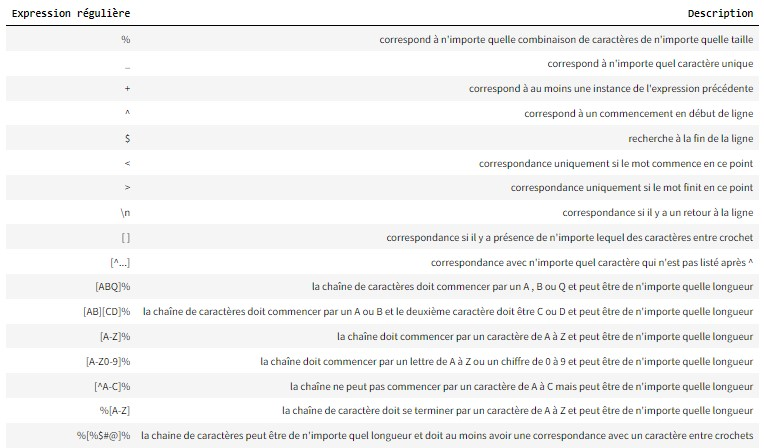

Nous allons ici utiliser les expressions régulières en SQL avec le mot-clé LIKE, et nous utiliserons la table tracks.

La table tracks se présente comme ceci :

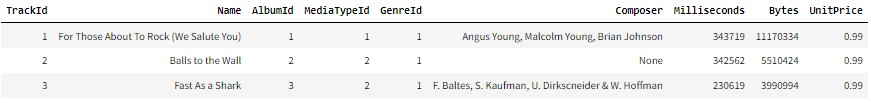

- g) Afficher les données des titres commençant par P.

select * from tracks where Name  LIKE  'P%';  
Afficher les données des titres commençant par P. POURQUOI [ ] NON PRESENT ET REMPLACÉS PAR ' '

SELECT* FROM tracks WHERE Name <= 3;
" ne donne pas des noms de moins de 3 caractères !! mais dont la 1ere lettre est <= 3

SELECT* FROM tracks WHERE Name  LIKE '___';      
Afficher les données des titres de 3 caractères  ( soit name = low ou Ali ou "?" ... )   

SELECT * FROM tracks WHERE Name  LIKE '_____';        
moins de 5 caracteres    
SELECT * FROM tracks WHERE Name  NOT LIKE '_____%';        
moins de 5 caracteres    

SELECT * FROM tracks WHERE composer LIKE '%Jimi%' AND Composer LIKE '%Hendrix%';    
Afficher les titres composés par 'Jimi Hendrix'. Attention, selon les albums le prénom et le nom peuvent être inversés.   

SELECT Name, Composer FROM tracks WHERE Composer LIKE '%/%' (AND Composer NOT LIKE '__/__') OR Composer LIKE '%-%';
Afficher les musiques issues d'une association d'artistes. Indice : Pour une association d'artistes, le nom est séparé par un / ou - à l'exception du groupe AC/DC.   



## Tri des données 
Il est possible de trier par ordre croissant les résultats d'une requête selon les valeurs d'une colonne en utilisant le mot-clé ORDER BY avec ASC (par défaut), ou DESC pour trier par ordre décroissant.

Traitez les questions suivante à l'aide de la table tracks.

- l) Trier les titres de musique par ordre alphabétique, on se limitera aux 10 premiers.   
Le mot clé LIMIT permet de choisir le nombre de résultats à afficher.

SELECT Name FROM tracks ORDER BY Name ASC LIMIT 10;   
Trier les titres de musique par ordre alphabétique, on se limitera aux 10 premiers.   

SELECT Name, Composer FROM tracks WHERE Composer LIKE '%AC/DC%' ORDER BY Name;   
Afficher les titres d'AC/DC dans l'ordre alphabétique.

SELECT Name, Milliseconds FROM tracks ORDER BY Milliseconds DESC LIMIT 5;   
Affichez les 5 titres les plus longs de la table tracks ainsi que leur durée. On pourra utiliser la colonne Milliseconds.

## Conclusion 
Nous avons appris dans ce cours comment faire des requêtes SQL pour interroger une base de données.

Voici les principales opérations à retenir de ce cours :

La projection :
- SELECT col1, col2 
- FROM table;
La sélection simple :
- SELECT * 
- FROM table 
- WHERE condition;   

Les opérateurs pour les conditions et les expressions régulières avec LIKE.   

Le tri :
- SELECT * 
- FROM table 
- ORDER BY col ASC;

# 3 - Requêtes SQL avancées 

Nous avons vu dans le notebook précédent les requêtes SQL à l'aide d'un widget intégré à la plateforme.

Dans cette partie, vous allez apprendre la syntaxe de requêtes SQL avancées.

## Jointures 
Les jointures servent à recoller des tables différentes ayant au moins un attribut en commun ou à minima comparable.

Nous allons illustrer le concept de jointures à l'aide des 2 tables suivantes Personnes et Vehicules :

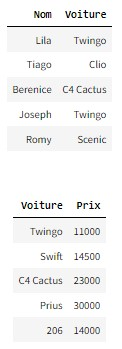

# 1. La jointure interne ou INNER JOIN
Ce type de jointure va permettre de **concaténer les tuples des 2 tables si une condition est satisfaite**.

Cette condition peut être de tout type tant qu'elle retourne un **booléen**. Cette condition sera souvent **l'égalité d'un attribut en commun** ; une clé primaire pour l'une et une clé étrangère pour l'autre par exemple, la clé étrangère faisant référence à la clé primaire de la première table.

Il est nécessaire de spécifier les attributs à utiliser pour effectuer la jointure. On utilise le mot-clé ON suivi de l'égalité souhaitée après avoir renseigné les tables dans l'INNER JOIN ou simplement JOIN, puisque la jointure interne est celle utilisée par défaut.

Ce type de jointure est **souvent déconseillé car il peut amener à la perte de beaucoup d'entrées**. Par contre, la **jointure interne ne produit aucun NaN**.

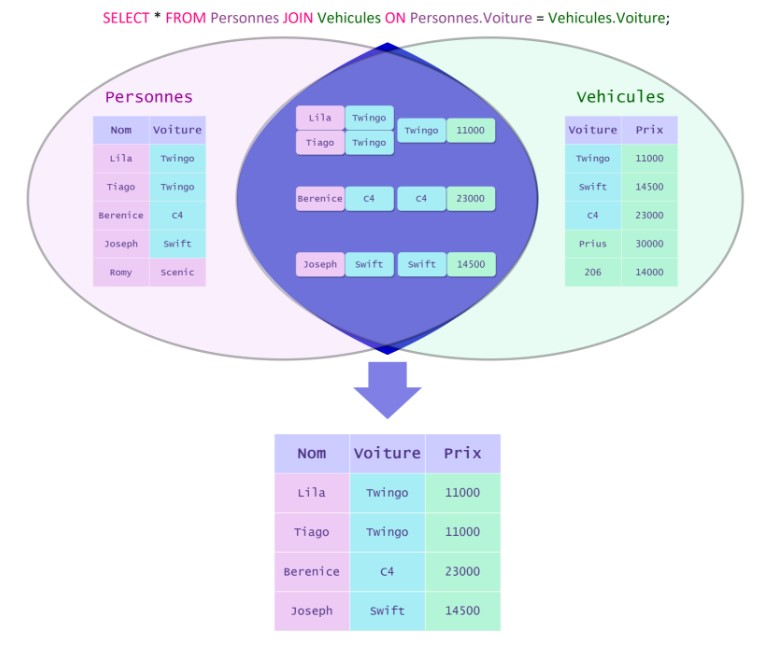

Ici Voiture est la clé primaire de Vehicules et la clé étrangère de Personnes, et nous ajoutons à la table Personnes toutes les informations contenues dans Vehicules concernant les voitures des individus de la table.

- a) Exécuter la cellule suivante afin d'importer et instancier le Widget, et de spécifier que la base de données sur laquelle effectuer les requêtes est chinook.db
- b) Utiliser le Widget afin de faire une jointure interne en utilisant la colonne GenreId, clé primaire de la table genres et clé étrangère de la table tracks.   
Pour rappel la table tracks et la table genres ressemblent à ceci:

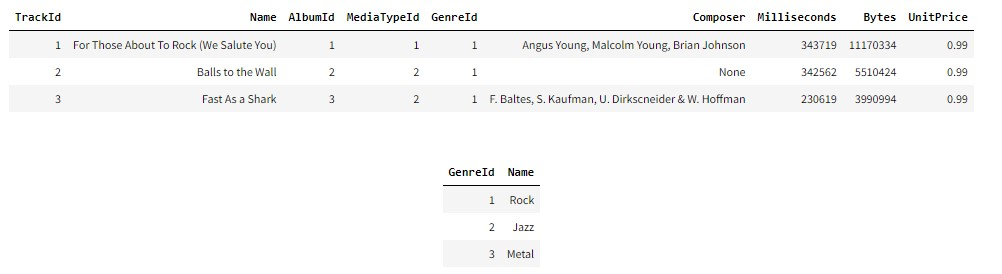

- La syntaxe **tracks.GenreId** au lieu de GenreId pour désigner la colonne GenreId de tracks permet d'éviter l'ambiguïté avec la colonne du même nom dans genres. Quand les colonnes n'ont pas le même nom qu'une autre colonne, cette syntaxe n'est pas obligatoire mais conseillée pour rester clair dans son code.

SELECT * FROM tracks JOIN genres ON tracks.GenreID = genres.GenreId;   
selectionner tout de table tracks jointe à table genres sur les colonnes communes tracks.GenreId et genres.GenreID   
=> donne ce tableau avec colonne Name de fin en + 

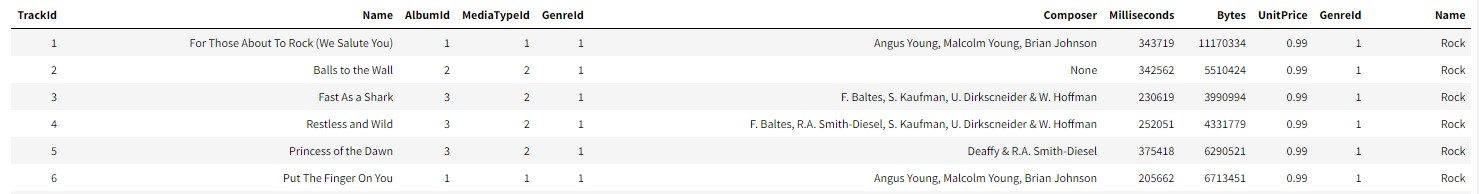

- On peut remarquer que la colonne GenreId est présente 2 fois dans la table résultant de la jointure, par ailleurs nous avons conservé suite à cette jointure des informations que nous ne souhaitions pas ici.

SELECT tracks.Name, tracks.GenreId, genres.Name FROM tracks 
JOIN genres ON tracks.GenreId = genres.GenreId;   

En utilisant une projection et une jointure interne, afficher dans une seule table les colonnes tracks.Name, tracks.GenreId et genres.Name.   
=> réduit les colonnes souhaitée avec JOIN

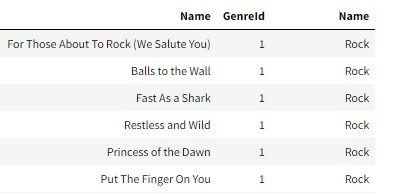

- Quand on joint des tables on obtient fréquemment des colonnes avec le même nom, on peut lever cette ambiguité à l'aide du mot-clé AS lors de l'utilisation de SELECT.

SELECT tracks.Name AS Titre, tracks.GenreId AS NumeroGenre, genres.Name AS NomGenre FROM tracks 
JOIN genres ON tracks.GenreId = genres.GenreId;    

En utilisant une projection, une jointure interne et le mot-clé AS, afficher dans une seule table les colonnes **renommées Titre, NumeroGenre et NomGenre**

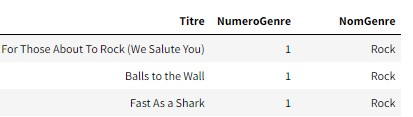

- e) Afficher dans une même table le titre des albums de la table albums avec le nom de l'artiste associé qui est répertorié dans la table artists.    
La table albums et la table artist sont les suivantes :

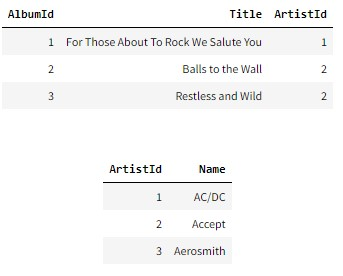

SELECT albums.Title, artists.Name FROM albums 
JOIN artists ON artists.ArtistId = albums.ArtistId; 

Afficher dans une même table le titre des albums de la table albums avec le nom de l'artiste associé qui est répertorié dans la table artists    
=> table de 2 colonnes 'Title' et 'Name'

## 2. La jointure à droite/gauche ou RIGHT JOIN / LEFT JOIN
La jointure à droite ou RIGHT JOIN est une jointure entre 2 tables qui permet de **retourner tous les enregistrements de la table de droite** même s’il n’y a pas de correspondance avec la table de gauche. S'il n'y a pas de correspondance, les valeurs manquantes sont définies NULL ou None.

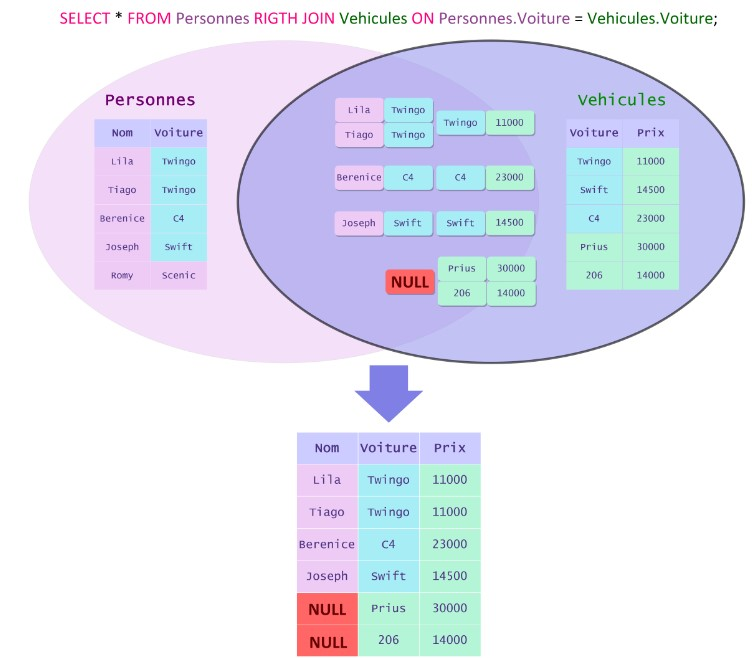

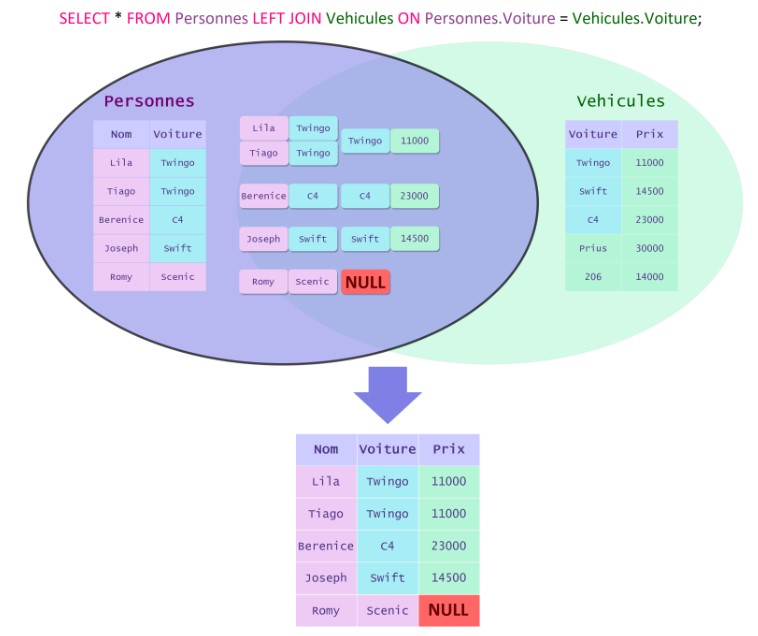

SELECT tracks.Composer, tracks.Name AS Song, artists.Name FROM tracks 
LEFT JOIN artists ON tracks.Composer = artists.Name WHERE tracks.Composer IS NOT NULL;

 À l'aide d'une jointure à gauche, afficher les compositeurs pour les lignes de la table artists ayant exactement pour compositeur un artiste de la table tracks, ou None le cas échéant. On enlèvera les lignes où l'artiste de la table tracks n'est pas spécifié.
 => 3 colonnes seulement, les alias ont seulement servi dans le code

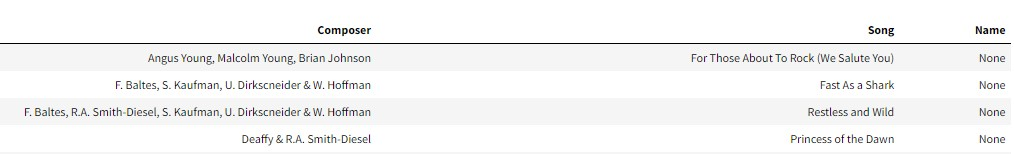

- g) À l'aide d'une jointure à gauche, afficher les titres de tracks pour lesquels un artiste de artists a participé à la composition et None sinon. Attention, il y a parfois plusieurs artistes qui ont travaillé à la conception d'une même musique;   
On pourra utiliser la notation table1.words LIKE ('%' || table2.word || '%'). L'opérateur || permettant de concaténer des chaînes de caractère, et comme % permet toujours de préciser que la séquence qui suit ou qui précède peut être n'importe laquelle, on considère comme cela bien tous les cas de figure ou le mot table2.word apparaît dans la séquence table1.words,

In [ ]:
SELECT artists.Name, tracks.Composer, tracks.Name AS Song
FROM artists 
LEFT JOIN tracks ON tracks.Composer LIKE ('%' || artists.Name || '%');


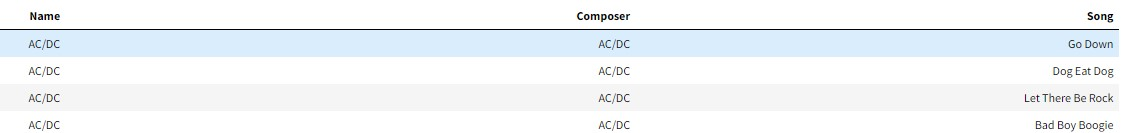

""" La jointure à droite RIGHT JOIN n'est pas disponible sur SQLite, mais il suffit pour la simuler d'inverser l'ordre des tables en utilisant la commande LEFT JOIN."""
- h) En simulant une jointure à droite à l'aide d'une jointure à gauche, afficher les compositeurs pour les lignes de la table tracks ayant exactement pour compositeur un artiste de la table artists, ou None le cas échéant.

In [ ]:
SELECT tracks.Composer, tracks.Name AS Song, artists.Name 
FROM tracks 
LEFT JOIN artists ON tracks.Composer = artists.Name;

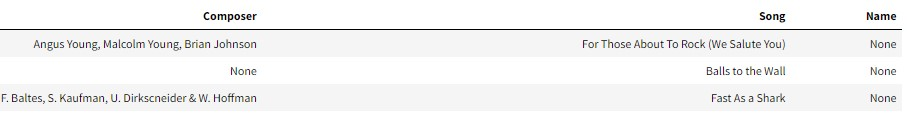

## 3. La jointure externe ou OUTER JOIN
La jointure externe ou OUTER JOIN est une jointure entre 2 tables qui permet de retourner tous les enregistrements des 2 tables même s'il n'y a pas de correspondance entre les deux. S'il n'y a pas de correspondance, les valeurs manquantes sont définies NULL.

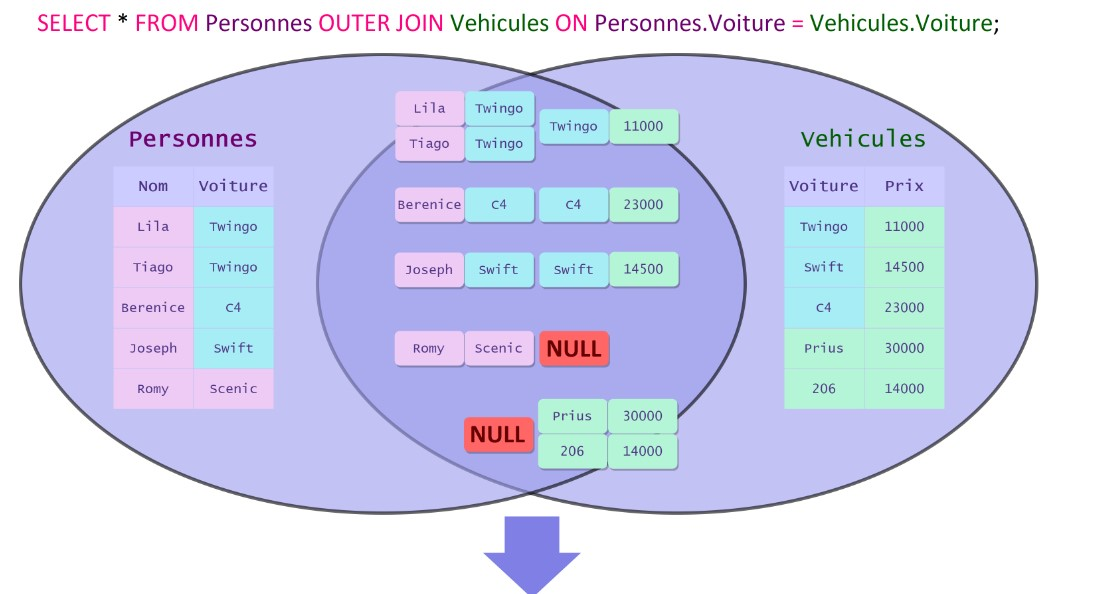

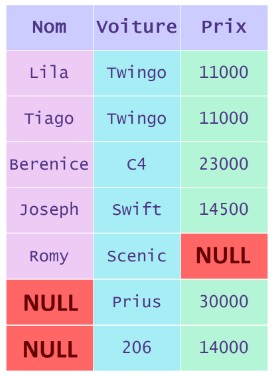

La jointure externe OUTER JOIN n'est pas disponible sur SQLite, nous détaillons ci-dessus le processus pour la simuler.   

La jointure externe n'est qu'une combinaison d'une LEFT JOIN et d'une RIGHT JOIN. Il nous faut donc effectuer ces deux opérations et joindre les 2 tables résultantes à l'aide du mot clé UNION.

- i) En simulant une jointure externe, récupérez une table présentant de manière unique tous les artistes présents dans les tables artists et tracks (avec les musiques correspondantes). On enlèvera les lignes où l'artiste de la table tracks n'est pas spécifié.

In [ ]:
SELECT tracks.Composer, tracks.Name AS Song, artists.Name FROM artists 
LEFT JOIN tracks ON tracks.Composer = artists.Name
WHERE tracks.Composer IS NOT NULL
UNION
SELECT tracks.Composer, tracks.Name AS Song, artists.Name FROM tracks 
LEFT JOIN artists ON tracks.Composer = artists.Name
WHERE tracks.Composer IS NOT NULL;

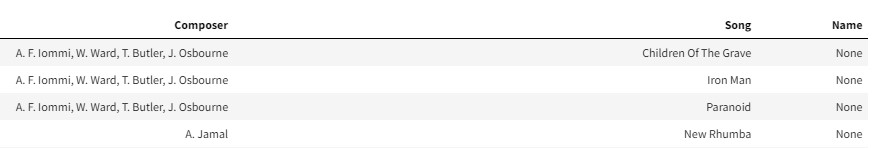

## 4. Les jointures exotiques
On peut également faire des jointures sur des requêtes, par exemple une autre jointure : on appelle cela une jointure imbriquée. Cela permet de joindre 3 tables ou plus!

La syntaxe est la suivante :

- SELECT table1.colonne1, a.colonne1 ... 
- FROM table1 
- JOIN (SELECT ... 
-     FROM table2 
-     JOIN table3 ON ...) AS a 
- ON ...;   

L'alias a sur la sous-requête est indispensable pour pouvoir faire la jointure sur cette requête, en particulier pour pouvoir nommer une colonne de la table créée par cette sous-requête.
- j) À l'aide d'une jointure interne imbriquée sur les tables tracks, albums et artists, affichez dans une table les titres des musiques ainsi que l'album dont elles font partie et leur interprète.

In [ ]:
SELECT tracks.Name AS 'Musique', a.Title AS 'Album', a.Name AS 'Artiste' 
FROM tracks 
JOIN (SELECT * 
    FROM albums 
    JOIN artists ON artists.ArtistId = albums.ArtistId) AS a
ON tracks.AlbumId = a.AlbumId;



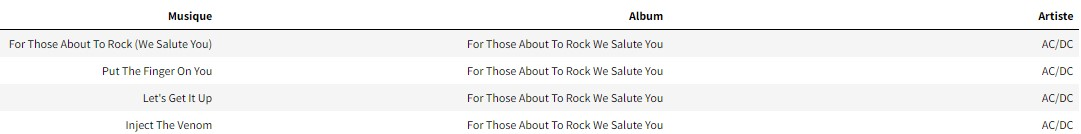

## auto-jointure
Dans le cas où une table permet d'accéder à des informations liées avec des entrées de la même table, il peut être utile de joindre la table avec elle même. On appelle cela une auto-jointure, la syntaxe reste la même mais nous avons besoin de l'alias pour lever les ambigüités !

Par exemple, si nous souhaitons utiliser la table employees afin de regrouper les informations d'un employé avec son supérieur hierarchique (contenu dans la colonne ReportsTo) on utilisera la syntaxe suivante :

- SELECT a.LastName, a.FirstName, a.Title, a.ReportsTo, e.LastName, e.FirstName, e.Title 
- FROM employees AS a 
- JOIN employees AS e ON a.ReportsTo = e.EmployeeId;

## Les fonctions d'aggrégation 
Jusqu'à présent on a effectué des opérations uniquement ligne par ligne. On peut également faire des opérations sur plusieurs lignes par exemple une moyenne ou un dénombrement :    
ce sont les fonctions d'aggrégation. Les plus classiques sont les suivantes :

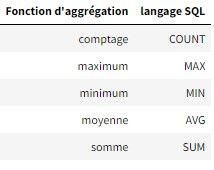

SELECT COUNT(TrackId) FROM tracks;   
Compter le nombre de musiques enregistrées dans la table tracks => 1 colonne à 1 valeur : COUNT(TrackID) 3503

SELECT AVG(Milliseconds) AS 'Durée Moyenne' FROM tracks;    
Afficher la durée moyenne d'une musique de la table tracks, à l'aide de la colonne Milliseconds. => Durée Moyenne 393599.212104


## Regroupement 
Pour obtenir des résultats par catégorie et pas uniquement sur une table en entier, il est possible d'appliquer des fonctions d'aggrégation en regroupant selon un ou plusieurs attributs à l'aide du mot-clé GROUP BY. La syntaxe est la suivante :

- SELECT colonne1, f(colonne2) 
- FROM table1
- GROUP BY colonne1;   

La répétition de colonne1 est nécessaire, ce code permet d'afficher f(colonne2) pour chaque type de la colonne1.

In [ ]:
'''
SELECT ArtistId, COUNT(AlbumId) AS Albums FROM albums 
GROUP BY ArtistId;
'''
Afficher le nombre d'albums par artiste à l'aide de la table albums, et des mots-clés COUNT et GROUP BY. => 2 cols (ArtistID et Albums) avec leur valeurs associées

'''
SELECT Name, Albums 
FROM artists 
JOIN (SELECT ArtistId,  COUNT(AlbumId) AS Albums FROM albums GROUP BY ArtistId) AS a 
ON artists.ArtistID = a.ArtistId;   '''

Avec une jointure interne, remplacer la colonne ArtistId de la requête précédente par le nom des artistes à l'aide de la table artists, on affichera également le nombre d'albums par artiste.
=> donne 2 cols Name et Albums ( par exe AC/DC Name -> 2 albums )

On peut également grouper selon plusieurs colonnes, et appliquer plusieurs fonctions avec la syntaxe :

- SELECT colonne1, ..., colonneN, f(colonneA), ..., f(colonneZ) 
- FROM table1
- GROUP BY colonne1, ..., colonneN;

In [ ]:
#Soit on décide de joindre les 3 tables selon les ArtistId et AlbumId et ensuite d'effectuer les opérations et regroupements
'''
SELECT NomArtiste, NomAlbum, SUM(Milliseconds) AS DureeAlbum, COUNT(b.Name) AS NbMusiques 
FROM (SELECT tracks.Name, Milliseconds, a.Title AS NomAlbum, a.Name AS NomArtiste 
    FROM tracks 
    JOIN (SELECT * 
        FROM albums 
        JOIN artists ON albums.ArtistId = artists.ArtistId) AS a 
    ON tracks.AlbumId = a.AlbumId) AS b 
GROUP BY NomArtiste, NomAlbum;
'''

#ou on décide d'effectuer le regroupement et les opérations entre tracks et albums selon l'ArtistID, et ensuite on ajoute les
#informations sur l'artiste

'''
SELECT Name AS NomArtiste, NomAlbum, DureeAlbum, NbMusiques 
FROM artists 
JOIN (SELECT ArtistId, Title AS NomAlbum, SUM(Milliseconds) AS DureeAlbum, COUNT(Name) AS NbMusiques 
    FROM tracks 
    JOIN albums ON tracks.AlbumId = albums.AlbumId 
    GROUP BY NomAlbum, ArtistId) AS a 
ON artists.ArtistId = a.ArtistId;
'''


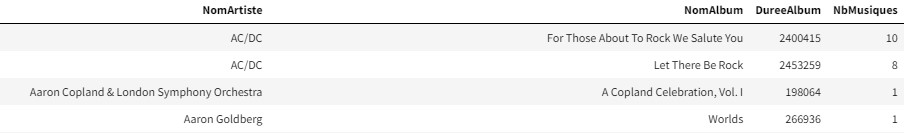

## Sélection en amont
On peut associer au regroupement des sélections. La sélection en amont concerne des conditions sur la table avant regroupement. Elle se fait comme une sélection classique avec le mot-clé WHERE, ici utilisé avant le GROUP BY:

- SELECT colonne1, f(colonne2) 
- FROM table1
- WHERE condition(table1) 
- GROUP BY colonne1;    

Dans une sélection en amont, la condition porte sur la table toute entière.

In [ ]:
SELECT AlbumId, COUNT(AlbumId) AS MusiquesLongues 
FROM tracks 
WHERE Milliseconds > 400000 
GROUP BY AlbumId;

""" p) Afficher le nombre de musiques de plus de 400 secondes par AlbumId en utilisant la table tracks """
=> 2 colonnes AlbumId et MusiquesLongues qui décompte 1, 2 , 1 ...

SELECT Title, NbMusiquesLongues AS MusiquesLongues 
FROM albums 
JOIN (SELECT AlbumId, COUNT(Name) AS NbMusiquesLongues 
    FROM tracks 
    WHERE Milliseconds > 400000 
    GROUP BY AlbumId) AS a 
ON albums.AlbumId = a.AlbumId;

""" q) Afficher le nombre de musiques de plus de 400 secondes par nom d'album à l'aide d'une jointure interne entre les tables tracks et albums."""
=> 2 colonnes Titel et MunsiquesLongues

## 2. Sélection en aval
La sélection en aval concerne des conditions sur la table après regroupement. Elle se fait avec le mot-clé HAVING utilisé après le GROUP BY. Le mot-clé HAVING permet de sélectionner en utilisant des fonctions telles que SUM(), COUNT(), AVG()...

- SELECT colonne1, f(colonne2)
- FROM table1 
- GROUP BY colonne1
- HAVING condition;

La condition porte sur la requête avant le HAVING, c'est-à-dire sur le résultat de : SELECT colonne1, f(colonne2)  FROM table1  GROUP BY colonne1

In [ ]:
SELECT AlbumId, COUNT(AlbumId) AS NbMusiques, Name
FROM tracks 
GROUP BY AlbumId 
HAVING NbMusiques >= 2;

""" r) Afficher les albums qui ne sont pas des singles (i.e. qui possède au moins 2 musiques), par AlbumId en utilisant la table tracks. """
=> 3 colonnes AlbumId, NbMusiques et Name ( 1, 10, For those About....)

SELECT Title AS NomAlbum, COUNT(tracks.AlbumId) AS NbMusiques, Name
FROM tracks 
JOIN albums ON tracks.AlbumId = albums.AlbumId 
GROUP BY NomAlbum 
HAVING NbMusiques >= 2;

""" s) Afficher les albums qui ne sont pas des singles en utilisant une jointure interne entre les tables tracks et albums. """
=> 3 colonnes NomùAlbum, NbMusiques et Name ( And justice for all, 9, Blackened...)

## Conclusion 
Nous avons appris dans ce cours comment faire des requêtes SQL avancées pour interroger une base de données.

Voici les principales opérations à retenir de ce cours :

La jointure interne :
- SELECT * 
- FROM table1 
- JOIN table2 ON table1.colonne1 = table2.colonne2;   

Les regroupements avec fonctions d'aggrégation :
- SELECT colonne1, f(colonne2) 
- FROM table1 
- GROUP BY colonne1;    

Les principales fonctions d'aggrégation : COUNT, SUM, AVG, MIN, MAX.

# 4 - Opérations sur les tables 

Nous avons vu comment faire des requêtes sur des bases de données fournies. Nous allons maintenant apprendre comment alimenter une base de données en créant, modifiant et supprimant des tables.

Dans ce notebook, nous allons voir comment alimenter la base college.db avec les parcours pédagogiques d'un établissement d'enseignement et les étudiants qui suivent des cours là-bas.

Il est possible que des erreurs surviennent dans ce module puisque vous allez créer, modifier et supprimer des éléments d'une base de données, reset le kernel ne suffira pas à réinitialiser la base. Si un problème survient, le plus simple est de supprimer les tables que vous avez créé et qui posent problème avec la commande DROP TABLE IF EXISTS nom_table; et de vous réferer ensuite aux cellules de correction. Cette manipulation sera détaillée d'avantage dans la dernière section de ce cours.
## Création de tables 
La création de table se fait à l'aide du mot-clé CREATE TABLE suivi du nom de la table. Ensuite dans les parenthèses, on précise le nom des colonnes ainsi que leur type et des contraintes si on veut en ajouter. Enfin on précise les clés primaires et étrangères.

Vous pourrez trouver un rappel de ces informations dans le premier notebook de ce module.

- a) Exécuter la cellule suivante afin d'importer et instancier le Widget, et de spécifier que la base de données sur laquelle effectuer les requêtes est college.db. Vous aurez directement accès au Widget dans les cellules suivantes.

In [ ]:
from Widget_Template import build_SQL_widget
build_SQL_widget("college.db")

- b) Dans la zone de saisie nouvellement créée, exécuter la commande SQL suivante afin de créer la table parcours qui contiendra les différents parcours proposés par l'établissement, en les décrivant à l'aide d'un id et d'un name.

In [ ]:
CREATE TABLE parcours (
    id INTEGER NOT NULL, 
    name VARCHAR,
    PRIMARY KEY (id));

# La contrainte NOT NULL après l'attribut id signifie que cet attribut doit toujours être rempli dans la table (car c'est un identifiant).

- c) Créer une table students qui permettra d'identifier les étudiants au sein de l'université. Les attributs de cette table seront l'id de l'étudiant, son prénom firstname, son nom lastname, ainsi que l'identifiant parcours_id du parcours suivi.

On pourra spécifier la clé primaire à l'aide du mot-clé PRIMARY KEY, ainsi que la clé étrangère avec FOREIGN KEY suivi du nom de la clé étrangère puis du mot-clé REFERENCES suivi du nom de la table de référence et le nom de la clé étrangère dans cette table.

In [ ]:
CREATE TABLE students (
  id INTEGER NOT NULL, 
  firstname VARCHAR,
  lastname VARCHAR,
  parcours_id INTEGER,
  PRIMARY KEY (id), 
  FOREIGN KEY (parcours_id) REFERENCES parcours (id));

Si vous avez exécuté un code sans avoir créé la contrainte de clé étrangère, vous ne pourrez pas éxécuter la cellule de la solution car la table parcours existe déjà dans votre base. Vous aurez besoin de recommencer en supprimant les tables comme expliqué dans la section Suppression de table plus bas dans ce notebook.

## Ajout de contraintes 
Lorsque l'on crée une table, nous ne pouvons pas toujours préciser les contraintes, par exemple les clés primaires ou des clés étrangères, au moment même de la création de celle-ci. Heureusement il existe des commandes permettant de les rajouter après dans un second temps.

Si vous n'avez pas précisé la clé étrangère dans la table students, vous pourriez exécuter le code suivant :

In [ ]:
ALTER TABLE students
ADD CONSTRAINT FK_parcours_id
FOREIGN KEY (parcours_id) REFERENCES parcours (id);

En SQLite, la méthode ADD CONSTRAINT de ALTER TABLE n'est pas disponible, il faut donc utiliser une table temporaire pour apporter les modifications. Le procédé est détaillée dans la documentation : https://www.sqlite.org/lang_altertable.html#otheralter

La commande précédente se décompose en 3 parties :

- Le mot-clé ALTER TABLE permet de spécifier le nom de la table sur laquelle ajouter la contrainte.
- Le mot-clé ADD CONSTRAINT permet de choisir le nom de la contrainte.
- La syntaxe de la contrainte.
Voici une liste non exhaustive des contraintes utilisées en SQL, ainsi que la syntaxe associée à chacune d'entre elles :

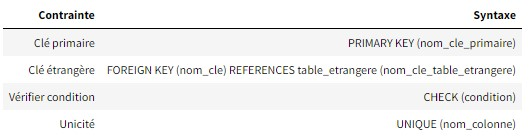

## Insertion de lignes 
Les insertions de lignes dans une table d'une base de données sont des transactions et vérifient donc les règles de cohérence des bases de données (les propriétés ACID, présentées dans le 1e notebook). La syntaxe générale pour insérer des lignes dans une table en SQL est la suivante :

INSERT INTO nom_table 
VALUES 
    tuple1, 
    tuple2, 
    ...
    ...,
    tupleN;
Lors de la création de nouveaux parcours, le directeur de l'établissement a besoin de les rajouter dans la base de données, il faut donc insérer des nouvelles lignes.

- d) Insérer les lignes correspondant aux parcours (1, "Data Engineering") et (2, "Data Science") dans la table parcours.

In [ ]:
INSERT INTO parcours 
VALUES 
    (1, "Data Engineering"), 
    (2, "Data Science");


- e) De la même manière, ajouter à la table students les nouveaux étudiants 'Jean Dubois' en 'Data Engineering' et 'Martin Dupont' en 'Data Science'. Pensez à utiliser les clés primaires et étrangères de la table.

In [ ]:
INSERT INTO students 
VALUES 
    (1, "Jean", "Dubois", 1), 
    (2, "Martin", "Dupont", 2);

- f) Vérifier que les lignes ont bien été ajoutées aux tables avec une requête. ( SHOW TABLES n'existe pas dans leur démo !!! )

In [ ]:
SELECT * FROM parcours;
""" donne
id	name
1	Data Engineering
2	Data Science
"""

In [ ]:
SELECT * FROM students;

## Suppression de lignes 
De la même manière qu'on peut insérer des lignes, on va pouvoir supprimer des lignes dans une base de données grâce au langage SQL grâce à la syntaxe suivante.

In [ ]:
DELETE FROM nom_table 
WHERE colonne = valeur;

- g) L'étudiant 'Jean Dubois' vient de se désinscrire de l'établissement. Supprimez le de la table students.

In [ ]:
DELETE FROM students
WHERE  id = 1;

""" donne
id	firstname	lastname	parcours_id
2	Martin	Dupont	  """

- h) Essayez de supprimer la ligne Data Science de la table parcours. Pourquoi n'est ce pas possible?

In [ ]:
DELETE FROM parcours 
WHERE id=2;
'''

impossible de supprimer ce parcours car la table students fait référence à cette ligne de parcours par une clé étrangère
et cette clé étrangère dans la table students bloque la suppression dans la table parcours  '''

## Modification de lignes 
La dernière opération sur les lignes utilisée en SQL est la modification. Cela peut arriver quand on a inséré une erreur sur un attribut d'une ligne. On modifie une (ou plusieurs) ligne(s) en utilisant les mots clés UPDATE et SET et la syntaxe suivante :

- UPDATE table
- SET colonne1 = nouvelle_valeur 
- WHERE colonne2 = valeur_ancienne;  

On modifie ici la colonne1 avec la nouvelle_valeur pour toutes les lignes dont la colonne2 vaut valeur_ancienne.

- i) Le directeur a fait une erreur de frappe pour l'étudiant d'identifiant 2 dans la table students. Modifiez son nom en 'Durand' à la place de 'Dupont'.

In [ ]:
UPDATE students
SET lastname = 'Durand' 
WHERE id = 2;

On peut effectuer sur la (les) même(s) ligne(s) plusieurs modifications en même temps les séparant par une virgule.

- j) L'étudiant s'appelle bien 'Dupont', mais son prénom est 'Marin' et pas 'Martin', aidez-le à retrouver son nom.

In [ ]:
UPDATE students
SET lastname = 'Dupont', firstname = 'Marin' # pas besoin du dupont ici qui ne change pas en fait
WHERE id = 2;


## Suppression de table 
Enfin, nous pouvons supprimer les tables d'une base de données. Pour cela, et si vous n'avez pas eu d'erreur jusqu'ici, la syntaxe à utiliser est la suivante :

DROP TABLE IF EXISTS nom_table;  

- k) Supprimer les tables students et ensuite parcours.  

Si vous supprimer d'abord la table parcours, alors que la table students en dépend au travers de sa clé primaire, cela ne va pas fonctionner.

In [ ]:
DROP TABLE IF EXISTS students;

In [ ]:
DROP TABLE IF EXISTS parcours;

## Conclusion 
Vous avez appris à manipuler directement les tables d'une base, voici les principales commandes à retenir :

Pour créer une table :   
    
- CREATE TABLE table (
 -  col1 TYPE1 CONTRAINTE1, 
 -  col2 TYPE2, PRIMARY KEY (col1));   

Pour ajouter une contrainte :   
    
- ALTER TABLE table 
- ADD CONSTRAINT nom_contrainte 
- CODE(contrainte);   

Pour insérer de nouvelles lignes :   
    
- INSERT INTO table 
- VALUES tuple1, tuple2;   

Pour supprimer des lignes :   

- DELETE FROM table 
- WHERE col1 = valeur;   

Pour modifier des lignes :   

- UPDATE table 
- SET col1 = valeur1 
- WHERE col2 = val2;   

Pour supprimer des lignes :  

- DROP TABLE IF EXISTS table;

# 5 - Bonus : SQLAlchemy 

Durant tout ce module nous vous avons présenté le fonctionnement de SQL, ou plus exactement **SQLite**, à travers un widget développé par notre équipe permettant d'écrire directement des requêtes. Ce widget repose en fait sur un **toolkit SQL** nommé **SQLAlchemy** permettant d'exploiter des bases de donneés relationnelles directement avec Python.

Dans ce notebook, nous allons nous passer du widget, en opérant directement à l'aide de **SQLAlchemy**.

Il est nécessaire pour ce module d'avoir des connaissances de base en Python   

- Exécuter la cellule suivante afin d'importer les packages pour ce notebook.

In [2]:
# Exécutez cette cellule pour importer les fonctions que l'on va utiliser
import sqlite3, sqlalchemy
from sqlalchemy import Table, Column, Integer, String, ForeignKey, MetaData, create_engine, text, inspect
from IPython.display import Markdown, display

## 1. SQLAlchemy
SQLAlchemy est une librairie Python très utilisée pour se connecter à un système de gestion de bases de données relationnelles, elle permet d'interpréter du code SQL.

On utilisera une base de données SQLite, plus légère et plus simple d'utilisation que la plupart des autres SGDBR.

Le premier objet important de ce module est l'**engine**. Il nous permet de nous connecter à une base de données et d'effectuer des requêtes SQL au format texte. La fonction create_engine crée une connexion avec une base de données. Si elle n'existe pas, la fonction va en créer une. L'argument est une chaîne de caractère qui a le format suivant : 'sqlite:///chemin_vers_la_base_de_donnees.db'

- a) Créer une connection à la base de données chinook.db que vous connaissez maintenant bien.

In [3]:
engine = create_engine('sqlite:///chinook.db', echo=True)
# En ajoutant l'argument echo = True, cela nous permet d'afficher la traduction en langage SQL des commandes du module

Une classe très pratique pour afficher des informations sur la base est l'Inspector, c'est un outil précieux pour comprendre à la fois le schéma des données ainsi que les contraintes qui s'opèrent entre elles.

- b) Exécuter la cellule suivante afin d'instancier la classe Inspector dans une variable nommée inspector.

In [4]:
inspector = inspect(engine)

In [5]:
inspector

A l'aide de cet objet, on va pouvoir récupérer le nom des différentes tables qui constituent la base de données. La méthode get_table_names nous permet de le faire.

- c) Exécuter la cellule suivante pour afficher les différentes tables présentes dans la base de données.

In [6]:
inspector.get_table_names()

2022-09-11 16:17:49,026 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-09-11 16:17:49,029 INFO sqlalchemy.engine.Engine [raw sql] ()


[]

In [ ]:
""" chez eux  output =
['albums',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoice_items',
 'invoices',
 'media_types',
 'playlist_track',
 'playlists',
 'sqlite_sequence',
 'sqlite_stat1',
 'tracks'] """

In [7]:
inspector.get_columns(table_name='albums')

2022-09-11 16:18:35,378 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("albums")
2022-09-11 16:18:35,379 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-09-11 16:18:35,381 INFO sqlalchemy.engine.Engine PRAGMA temp.table_xinfo("albums")
2022-09-11 16:18:35,385 INFO sqlalchemy.engine.Engine [raw sql] ()


[]

In [ ]:
""" chez eux output = 
[{'name': 'AlbumId',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'Title',
  'type': NVARCHAR(length=160),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'ArtistId',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}] """

 Remarquez que l'objet retourné est une liste de 3 éléments. Chacun de ces éléments regroupent les informations d'un attribut de la table. On peut y trouver le nom de la table mais aussi un argument primary_key qui est fixé à 1 si l'attribut est une clé primaire.
La méthode get_foreign_keys de l'objet inspector permet d'afficher les clés étrangères associées à une table passée en argument.

- e) afficher les clés étrangères de la table albums à l'aide de la cellule suivante.

In [8]:
inspector.get_foreign_keys(table_name='albums')

2022-09-11 16:22:29,540 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("albums")
2022-09-11 16:22:29,541 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-09-11 16:22:29,545 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("albums")
2022-09-11 16:22:29,546 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-09-11 16:22:29,547 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-09-11 16:22:29,548 INFO sqlalchemy.engine.Engine [raw sql] ('albums',)


[]

In [ ]:
""" chez eux output = 
[{'name': None,
  'constrained_columns': ['ArtistId'],
  'referred_schema': None,
  'referred_table': 'artists',
  'referred_columns': ['ArtistId'],
  'options': {}}] """

Pour effectuer des requêtes SQL, on a besoin d'une connexion avec l'objet engine. Pour cela on utilise la méthode connect qui renvoie une instance de la classe Connection.

- f) Instancier la classe Connection dans une variable nommée conn.

In [9]:
conn = engine.connect()

On peut désormais utiliser la **méthode execute** associée à une instance de la classe Connection crée précédemment.

Elle prend en argument une chaîne de caractères qui correspond à notre requête en langage SQL.

Pour obtenir le résultat de cette requête dans Python, on utilise la méthode fetchallassociée à cet objet.

- g) Afficher 10 lignes de la colonne Title de la table Albums.
Afin de s'assurer que notre requête soit bien interprétée par SQLAlchemy on utilisera la fonction text précédemment importée.

In [ ]:
stmt = text("SELECT Title FROM albums LIMIT 10;")
result = conn.execute(stmt)
result.fetchall() 

In [ ]:
""" output
[('For Those About To Rock We Salute You',),
 ('Balls to the Wall',),
 ('Restless and Wild',),
 ('Let There Be Rock',),
 ('Big Ones',),
 ('Jagged Little Pill',),
 ('Facelift',),
 ('Warner 25 Anos',),
 ('Plays Metallica By Four Cellos',),
 ('Audioslave',)] """

- h) Pour chaque commande de la table invoices, le prix est identifié par Total. Afficher le montant total des commandes par identifiant client CustomerId à l'aide de la méthode GROUP BY, on pourra les trier par ordre décroissant.

In [ ]:
stmt = text("SELECT invoices.CustomerId , SUM(Total) AS tot FROM invoices GROUP BY CustomerId ORDER BY tot DESC;")
result = conn.execute(stmt)
result.fetchall()

In [ ]:
"""
[(6, 49.620000000000005),
 (26, 47.620000000000005),
 (57, 46.62),
 (45, 45.62),
 (46, 45.62),
 (28, 43.620000000000005),
 (24, 43.62),
 (37, 43.62),
 (7, 42.62),
 (25, 42.62),
 (44, 41.620000000000005),
 (5, 40.620000000000005),
 (43, 40.620000000000005),
 (48, 40.62),
 (17, 39.620000000000005),
 (34, 39.620000000000005),
 (1, 39.62),
 (3, 39.62),
 (4, 39.62),
 (20, 39.62),
 (22, 39.62),
 (42, 39.62),
 (15, 38.620000000000005),
 (19, 38.620000000000005),
 (39, 38.620000000000005),
 (40, 38.620000000000005),
 (51, 38.620000000000005),
 (58, 38.620000000000005),
 (2, 37.620000000000005),
 (9, 37.620000000000005),
 (10, 37.620000000000005),
 (11, 37.620000000000005),
 (13, 37.620000000000005),
 (14, 37.620000000000005),
 (18, 37.620000000000005),
 (27, 37.620000000000005),
 (30, 37.620000000000005),
 (31, 37.620000000000005),
 (32, 37.620000000000005),
 (35, 37.620000000000005),
 (36, 37.620000000000005),
 (38, 37.620000000000005),
 (41, 37.620000000000005),
 (47, 37.620000000000005),
 (49, 37.620000000000005),
 (52, 37.620000000000005),
 (53, 37.620000000000005),
 (55, 37.620000000000005),
 (56, 37.620000000000005),
 (8, 37.62),
 (12, 37.62),
 (16, 37.62),
 (21, 37.62),
 (23, 37.62),
 (29, 37.62),
 (33, 37.62),
 (50, 37.62),
 (54, 37.62),
 (59, 36.64)] """

Comme vous pouvez le voir, il est très simple d'exécuter des requêtes à l'aide de SQLAlchemy.

## 2. Création de table 
Nous allons reprendre le notebook numéro donc vous allez à nouveau voir comment alimenter la base college.db avec les parcours pédagogiques d'un établissement d'enseignement et les étudiants qui suivent des cours là-bas, mais en utilisant cette fois-ci la syntaxe SQLAlchemy.

L'objet créé par la fonction MetaData permet de regrouper plusieurs informations concernant une ou plusieurs bases de données, notamment des informations sur les tables qui la composent, on utilisera cet objet lors de leurs créations.

- i) Créer une base de données college.db.

In [11]:
engine = create_engine('sqlite:///college.db', echo=True)

- j) instancier un objet de la classe MetaData nommé meta.

In [12]:
meta = MetaData()

Pour créer une table on fait appel à la classe Table. Cette fonction est liée à l'objet engine. Les deux premiers arguments sont le nom de la table, ainsi que l'objet meta que l'on a créé précédemment. Les arguments restants sont des objets de type Column représentant chacun un attribut de la table. Le constructeur de cet objet prend en arguments un nom, le type de l'attribut (String, Integer, ...) et s'il s'agit d'une clé primaire ou pas (primary_key=True).

- k) Créer une table parcours qui permettra d'identifier la filière de l'étudiant au sein de l'établissement. Cette table aura comme attributs l'identifiant id du parcours qui sera une clé primaire et son nom name.


In [ ]:
parcours = Table(
   'parcours', meta, 
   Column('id', Integer, primary_key=True), 
   Column('name', String)
)

- l) utiliser la méthode create_all associée à l'objet meta pour sauvegarder les changements sur la base de donneés (l'argument pris par cette fonction est un objet engine).

In [ ]:
meta.create_all(engine)

In [ ]:
"""
2022-09-11 14:31:00,057 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2022-09-11 14:31:00,058 INFO sqlalchemy.engine.base.Engine ()
2022-09-11 14:31:00,059 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2022-09-11 14:31:00,059 INFO sqlalchemy.engine.base.Engine ()
2022-09-11 14:31:00,060 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("parcours")
2022-09-11 14:31:00,060 INFO sqlalchemy.engine.base.Engine ()
2022-09-11 14:31:00,062 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE parcours (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	PRIMARY KEY (id)
)


2022-09-11 14:31:00,062 INFO sqlalchemy.engine.base.Engine ()
2022-09-11 14:31:00,067 INFO sqlalchemy.engine.base.Engine COMMIT """

Grâce au echo=True, on peut voir le code utilisé pour créer la table:

In [ ]:
CREATE TABLE parcours (
    id INTEGER NOT NULL, 
    name VARCHAR, 
    PRIMARY KEY (id)
)

Qui n'est rien d'autre que la requête que vous aviez utilisé dans le précédent notebook pour créer la table parcours.

En SQL on choisit le nom de la table après le CREATE TABLE. Ensuite, entre parenthèses, on précise le nom des colonnes ainsi que leur type et des contraintes si jamais on veut en ajouter. Enfin on précise quelles sont les clés primaires.

- m) créer une table students ayant comme attributs un identifiant id qui en sera la clé primaire, un prénom firstname au format String, un nom lastname au format String, ainsi que l'identifiant parcours_id du parcours suivi qui est une clé étrangère.   

On pourra préciser une clé étrangère en utilisant la syntaxe suivante :
Column('colonne_name', type, ForeignKey("table_name.colonne_name"))

In [ ]:
students = Table(
   'students', meta, 
   Column('id', Integer, primary_key=True), 
   Column('firstname', String), 
   Column('lastname', String),
   Column('parcours_id', Integer, ForeignKey("parcours.id")),
)

meta.create_all(engine)

In [ ]:
"""
2022-09-11 14:32:59,489 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("parcours")
2022-09-11 14:32:59,490 INFO sqlalchemy.engine.base.Engine ()
2022-09-11 14:32:59,491 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("students")
2022-09-11 14:32:59,491 INFO sqlalchemy.engine.base.Engine ()
2022-09-11 14:32:59,492 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE students (
	id INTEGER NOT NULL, 
	firstname VARCHAR, 
	lastname VARCHAR, 
	parcours_id INTEGER, 
	PRIMARY KEY (id), 
	FOREIGN KEY(parcours_id) REFERENCES parcours (id)
)


2022-09-11 14:32:59,493 INFO sqlalchemy.engine.base.Engine ()
2022-09-11 14:32:59,497 INFO sqlalchemy.engine.base.Engine COMMIT """

## 3. Modifications de table
Lorsque l'on modifie ou effectue une ou plusieurs opération(s) importante(s) sur une table, il est nécessaire de se prévenir de toute erreur de manipulation. Pour créer une transaction il faut connecter la machine à l'aide de la méthode connect de l'engine.

Une transaction a un début et une fin. Le début de la transaction est indiqué par la fonction begin associée à l'objet précédemment créé par la méthode connect.

Via cet objet, on pourra appeller la fonction rollback dans le cas où une opération de la transaction n'a pas été autorisée : on revient à l'état initial de la table.

La fonction commit permet elle de valider la transaction le cas échéant. En Python, cela nous donne la structure suivante:

In [ ]:
# on crée la connection     
with engine.connect() as connection:
    # début de la transaction
    with connection.begin() as transaction:
        # on tente d'éxécuter une transaction
        try:
            connection.execute(instruction)
        # si la transaction échoue
        except:
            transaction.rollback()
            raise
        # si la transaction réussit
        else:
            transaction.commit()

L'argument instruction correspond à l'opération qui sera effectuée au sein de la transaction.

Lorsqu'on effectue une requête, qui est la forme de transaction la plus simple, ce fonctionnement est fait implicitement.

## Insertion de lignes
Dans une table, on peut insérer ou supprimer des lignes. Ces opérations sont considérées comme des transactions et sont donc soumises aux règles qui assurent la cohérence de la base de données.

Pour insérer des tuples, on doit d'abord créer une liste qui contient des tuples. Ces tuples doivent représenter les valeurs des différents attributs de la table : la liste a donc la longueur du nombre de lignes qu'on veut insérer et chaque tuple a le même nombre d'entrées que la table.

- n) Créer une liste values1 contenant les informations des 2 parcours de la table parcours, on les identifiera par (1, "Data Engineering") et (2, "Data Science"). Créer une liste values2 contenant les informations de 2 étudiants de la table students, on choisira les noms et prénoms que l'on souhaite.    
Attention cependant à bien respecter les contraintes liées à l'unicité de la clé primaire et à l'existence de la clé étrangère.

In [ ]:
values1 = [
    (1, "Data Engineering"),
    (2, "Data Science"),
    ]

values2 = [
    (1, "Jean", "Dubois", 1),
    (2, "Martin", "Dupont", 2),
    ]

La syntaxe SQL pour ajouter un tuple dans une table est la suivante :

INSERT INTO nom_table 
VALUES tuple;
Cette commande est en langage SQL, et sera donc au format texte sous python si on souhaite l'exécuter.

On note 'INSERT INTO {tablename} VALUES ({markers})' où tablename sera le nom de la table et markers sera une variable explicitant le format des tuples que l'on injectera dans la table.

Une fois le tablename et le markers définis, on peut mettre à jour notre requête SQL en modifiant son format à l'aide de la méthode format de Python (doc) permettant des substitutions de valeurs et des mises en forme à l'intérieur de chaînes de caractères.

Cela permet que tablename et markers ne soit pas considéré comme une chaîne de caractères mais bien un argument.

   Pour définir correctement un markers, on peut utiliser la fonction suivante ','.join( '?' * len(values[0])) qui permet de définir un format correspondant à un tuple de la bonne longueur.
- o) Exécuter la cellule suivante pour insérer dans la table parcours les valeurs précédemment définies dans la liste values1.

In [ ]:
# on crée la connection
with engine.connect() as connection:
    # début de la transaction
    with connection.begin() as transaction:
        # on tente d'éxécuter une transaction
        try:
            # On indique le format d'un tuple de cette table
            markers = ','.join('?' * len(values1[0])) 
            
            # On utilise le langage SQL en format texte où markers est le format d'un tuple
            ins = 'INSERT INTO {tablename} VALUES ({markers})'
            
            # On précise ce format particulier grâce à la fonction membre format
            ins = ins.format(tablename=parcours.name, markers=markers)
           
            # Enfin on peut utiliser les tuples créés en éxécutant la commande SQL
            connection.execute(ins, values1)
        # si la transaction échoue
        except:
            transaction.rollback()
            raise
        # si la transaction réussit
        else:
            transaction.commit()

   Si vous exécutez 2 fois le code précédent, une erreur apparaîtra car les tuples sont déjà présent dans la base. La contrainte d'unicité de la clé primaire n'est alors plus respectée.
- p) En utilisant une transaction SQLAlchemy, insérer dans la table students les valeurs précédemment définies dans la liste values2.

In [ ]:
with engine.connect() as connection:
    with connection.begin() as transaction:
        try:
            markers = ','.join('?' * len(values2[0])) 
            ins = 'INSERT INTO {tablename} VALUES ({markers})'
            
            ins = ins.format(tablename=students.name, markers=markers)
            connection.execute(ins, values2)
        except:
            transaction.rollback()
            raise
        else:
            transaction.commit()

- q) Vous pouvez lancer la cellule suivante pour voir les éléments contenus dans les bases.

In [ ]:
# Exécuter cette cellule
with engine.connect() as connection:
    results = connection.execute("SELECT * FROM students;")
    print(results.fetchall())

with engine.connect() as connection:
    results = connection.execute("SELECT * FROM parcours;")
    print(results.fetchall())

In [ ]:
"""
2022-09-11 14:38:38,295 INFO sqlalchemy.engine.base.Engine SELECT * FROM students;
2022-09-11 14:38:38,296 INFO sqlalchemy.engine.base.Engine ()
[]
2022-09-11 14:38:38,297 INFO sqlalchemy.engine.base.Engine SELECT * FROM parcours;
2022-09-11 14:38:38,298 INFO sqlalchemy.engine.base.Engine ()
[] """ tout est vide

## Suppression de table
Si l'on souhaite supprimer des lignes, il faut faire attention à la cohérence de la base de données. Dans notre exemple, on ne peut pas suprimer uniquement le tuple d'un des deux parcours de la table parcours. En effet, dans la table students un des attributs fait référence à la clé primaire d'un parcours. Cet attribut n'aurait donc plus de sens, et les transactions **ACID** nous permettent d'interdire ce genre de transaction.

   Si un parcours est retiré du programme de l'université et doit être retiré de la base, il faut aussi supprimer les lignes des étudiants associés (ici les étudiants suivent 1 seul cursus et sont donc malheureusement mis à la porte...) dans la table students. Pour supprimer ou modifier une ligne en particulier, il faut utiliser vos connaissances en langage SQL, notamment en ce qui concerne la recherche de tuple vérifiant une condition
On va procéder plus simplement ici et supprimer la table students.

- r) Supprimer la table students de la base de donnée à l'aide des connaissances acquises jusqu'ici en SQL et SQLAlchemy. Puis vérifier qu'elle est bien supprimée en essayant d'y insérer un tuple.

In [ ]:
sql = text('DROP TABLE IF EXISTS students;')
result = engine.execute(sql)

###Vérification que la table students n'existe plus en réutilisant le code d'insertion de tuple

#values = [
#    (1,"Jean", "Dubois", 1),
#    (2,"Martin", "Dupont", 2),
#    ]
#
#with engine.connect() as connection:
#    with connection.begin() as transaction:
#        try:
#            markers = ','.join('?' * len(values[0])) 
#            ins = 'INSERT INTO students VALUES ({markers})'
#            ins = ins.format(tablename=students.name, markers=markers)
#            connection.execute(ins, values)
#        except:
#            transaction.rollback()
#            raise
#        else:
#            transaction.commit()    
=> créé une erreur sur cette verif si on la lance car table n'existe plus

## Conclusion
Dans ce cours nous avons vu la structure à utiliser pour se connecter à une base de données et effectuer des requêtes sur une base de données relationnelles, ce qu'il faut retenir :

- la structure de connection à une base de données avec SQLAlchemy
- la syntaxe pour effectuer des requêtes SQL à l'aide de SQLAlchemy
- la syntaxe pour créer, modifier ou supprimer une table en SQL